In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aita-clean-data-v2/cleaned_data.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import torch
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


device = 0 if torch.cuda.is_available() else -1 # checking for gpu


In [3]:
DATA = "/kaggle/input/aita-clean-data-v2/cleaned_data.csv"

In [4]:
df = pd.read_csv(DATA)

# df = df.sample(n=1000, random_state=42)
print("df size : ", len(df))
df.head()

df size :  29822


,Unnamed: 0,title,title.1,body,top_comment_1,top_comment_2,top_comment_3,top_comment_4,top_comment_5,top_comment_6,top_comment_7,top_comment_8,top_comment_9,top_comment_10,verdict
0,0,aita for not taking one of my players complain...,aita for not taking one of my players complain...,i dm for a group of 5 people will lorraine ben...,nta listen youre the dm and seen as the figure...,nta yet because you are taking it seriously th...,nta i think you should talk with her a little ...,nta if she feels uncomfortable because shes in...,nta sounds like holly is being a territorial s...,nah but theres an easy way to solve it dump th...,nta it sounds like the person who made the com...,i would say nah i think holly is certainly ent...,nta likeyoure in charge of the game but youre ...,nah holly has issues of her own most likely an...,nta
1,1,aita for not going to my stepsisters graduatio...,NaN,i 18m just graduated grade 12 this year my you...,nta my response would be thank you for the inv...,so nta and dont go i have never heard of a 7th...,nta what the hell is your step mum messaging y...,nta dont go you would be miserable and angry s...,nta id lie my ass off and say i cant attend be...,nta and i have to say youre being the only res...,nta now that you are 18 you get to pick who yo...,nta you dont feel like partying and are reason...,nta your stepmom and dad are definitely ahs an...,nta they treat you very badly that is a simple...,nta
2,2,aita for not paying half,NaN,a new friend of mine and i discovered we have ...,nta sorry thats not the scope of birthday cele...,nta you dont plan an intimate party with anoth...,nta stop with the jade justify argue defend ex...,nta do not feel bad for standing your ground w...,nta she obviously just wanted to stick you wit...,nta paying for her mistakes doesnt make you an...,nta she is trying to use you and knew it befor...,nta you signed up for an intimate party thats ...,you said x she agreed and now wants to to pay ...,nta i think the number of people and maximum b...,nta
3,3,aita for potentially getting my upstairs neigh...,NaN,im really conflicted with this so id like some...,nta you are well within your rights to complai...,nta this is not you being petty im surprised m...,sorry but you dont move into an apartment comp...,nta water overflowing into your apartment is d...,nta maybe theyve received similar warning and ...,nta you arent getting anyone evicted they are ...,its super weird that management would send you...,nta you need to look as the kids have nothing ...,nta its not you who is making them homeless it...,nta repeated bathtub overflows caused a massiv...,nta
4,4,aita for demanding to go through my partners p...,aita for demanding to go through my partners p...,for context weve been dating for 15 years also...,nta i feel like most people would have gone sn...,nta if there was nothing to hide i wouldve sho...,man this is a tough one to be honest im really...,yta either trust her or dont and decide where ...,nta it honestly blows me away how many people ...,yta simply for demanding to go through her pho...,nta shes hiding something your lack of trust i...,yta 15 years together with no stated reasons o...,esh its a really crappy situation but if you t...,esh these commentors act like no one cheats or...,yta


In [5]:
df['verdict'].value_counts()

verdict
nta        25931
yta         3784
unknown      107
Name: count, dtype: int64

In [6]:
df = df[df['verdict'] != 'unknown']
print("df size : ", len(df))

df size :  29715


In [7]:
df['title'] = df['title'].fillna('')
df['body'] = df['body'].fillna('')
df['text'] = df['title'] + " " + df["body"]
df.head()

,Unnamed: 0,title,title.1,body,top_comment_1,top_comment_2,top_comment_3,top_comment_4,top_comment_5,top_comment_6,top_comment_7,top_comment_8,top_comment_9,top_comment_10,verdict,text
0,0,aita for not taking one of my players complain...,aita for not taking one of my players complain...,i dm for a group of 5 people will lorraine ben...,nta listen youre the dm and seen as the figure...,nta yet because you are taking it seriously th...,nta i think you should talk with her a little ...,nta if she feels uncomfortable because shes in...,nta sounds like holly is being a territorial s...,nah but theres an easy way to solve it dump th...,nta it sounds like the person who made the com...,i would say nah i think holly is certainly ent...,nta likeyoure in charge of the game but youre ...,nah holly has issues of her own most likely an...,nta,aita for not taking one of my players complain...
1,1,aita for not going to my stepsisters graduatio...,NaN,i 18m just graduated grade 12 this year my you...,nta my response would be thank you for the inv...,so nta and dont go i have never heard of a 7th...,nta what the hell is your step mum messaging y...,nta dont go you would be miserable and angry s...,nta id lie my ass off and say i cant attend be...,nta and i have to say youre being the only res...,nta now that you are 18 you get to pick who yo...,nta you dont feel like partying and are reason...,nta your stepmom and dad are definitely ahs an...,nta they treat you very badly that is a simple...,nta,aita for not going to my stepsisters graduatio...
2,2,aita for not paying half,NaN,a new friend of mine and i discovered we have ...,nta sorry thats not the scope of birthday cele...,nta you dont plan an intimate party with anoth...,nta stop with the jade justify argue defend ex...,nta do not feel bad for standing your ground w...,nta she obviously just wanted to stick you wit...,nta paying for her mistakes doesnt make you an...,nta she is trying to use you and knew it befor...,nta you signed up for an intimate party thats ...,you said x she agreed and now wants to to pay ...,nta i think the number of people and maximum b...,nta,aita for not paying half a new friend of mine ...
3,3,aita for potentially getting my upstairs neigh...,NaN,im really conflicted with this so id like some...,nta you are well within your rights to complai...,nta this is not you being petty im surprised m...,sorry but you dont move into an apartment comp...,nta water overflowing into your apartment is d...,nta maybe theyve received similar warning and ...,nta you arent getting anyone evicted they are ...,its super weird that management would send you...,nta you need to look as the kids have nothing ...,nta its not you who is making them homeless it...,nta repeated bathtub overflows caused a massiv...,nta,aita for potentially getting my upstairs neigh...
4,4,aita for demanding to go through my partners p...,aita for demanding to go through my partners p...,for context weve been dating for 15 years also...,nta i feel like most people would have gone sn...,nta if there was nothing to hide i wouldve sho...,man this is a tough one to be honest im really...,yta either trust her or dont and decide where ...,nta it honestly blows me away how many people ...,yta simply for demanding to go through her pho...,nta shes hiding something your lack of trust i...,yta 15 years together with no stated reasons o...,esh its a really crappy situation but if you t...,esh these commentors act like no one cheats or...,yta,aita for demanding to go through my partners p...


In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load tokenizer and model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [9]:
predictions = nlp(df['text'].tolist(), truncation=True)

In [10]:
predicted_labels = [1 if pred['label'] == 'POSITIVE' else 0 for pred in predictions]
true_labels = df['verdict'].map({'yta': 0, 'nta': 1}).tolist()

df['predicted'] = predicted_labels
df['label'] = true_labels

In [11]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Precision: 0.825925925925926
Recall: 0.01719949095676989
F1 Score: 0.03369725359827736


In [12]:
item = df[(df['predicted'] == 1) & (df['label'] == 1)].iloc[0]
item.text

'aita for not inviting my sister to my wedding i 25m and am engaged to my fiance 24f i have an older sister who well call riley who is 5 years older than me my whole life she picked on me stole my things and was just a straight up asshole to me but to everyone else she seemed to be an angel this led to us never getting close and we never really cared about each other it was such a relief for me when she moved out and i felt like a weight had been lifted off my chest i am now living with my fiance in a small apartment i havent talked to my sister since she moved out and i never planned to connect with her again last month i contacted my parents telling them that i was getting married they were ecstatic and asked who was coming it wasnt going to be a huge wedding because neither me nor alexia my fiance liked the idea of a big wedding we planned on inviting some of alexias friends some of my friends and my parents my parents seemed confused when rileys name never popped up they asked me i

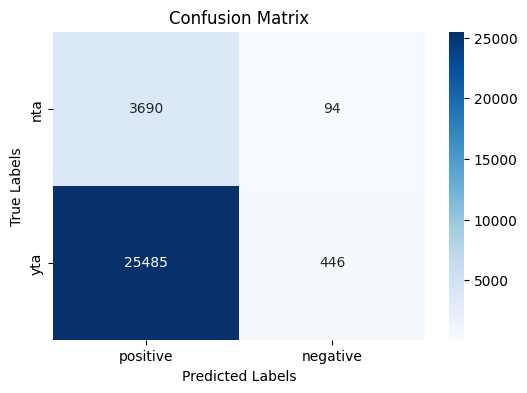

In [13]:
true_axis_labels = ['nta', 'yta']  # labels 0, 1
predicted_axis_labels = ['positive', 'negative']   # labels 0, 1
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=predicted_axis_labels, yticklabels=true_axis_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()